# Automação de processos

1. buscar, de forma automatica, informaçoes de ações da bolsa de valores
2. criar as analises solicitadas pelo Gestor
3. enviar, automaticamente, um email com os resultados das ánalises 
4. bibliotecas : yfinance , pyautogui , pyperclip

In [3]:
 pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [4]:
import yfinance as yf
import matplotlib.pyplot as plt

/tmp/ipykernel_2325/1179534411.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  primeiro_preco= historico[0] #primeiro valor
/tmp/ipykernel_2325/1179534411.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ultimo_preco= historico[-1] #ultimo valor
/tmp/ipykernel_2325/1179534411.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  preco_atual= historico[-1] #preço atual do ticker
/tmp/ipykernel_2325/1179534411.py:23: FutureWarnin

A ação teve uma queda de -9.66% durante o período.


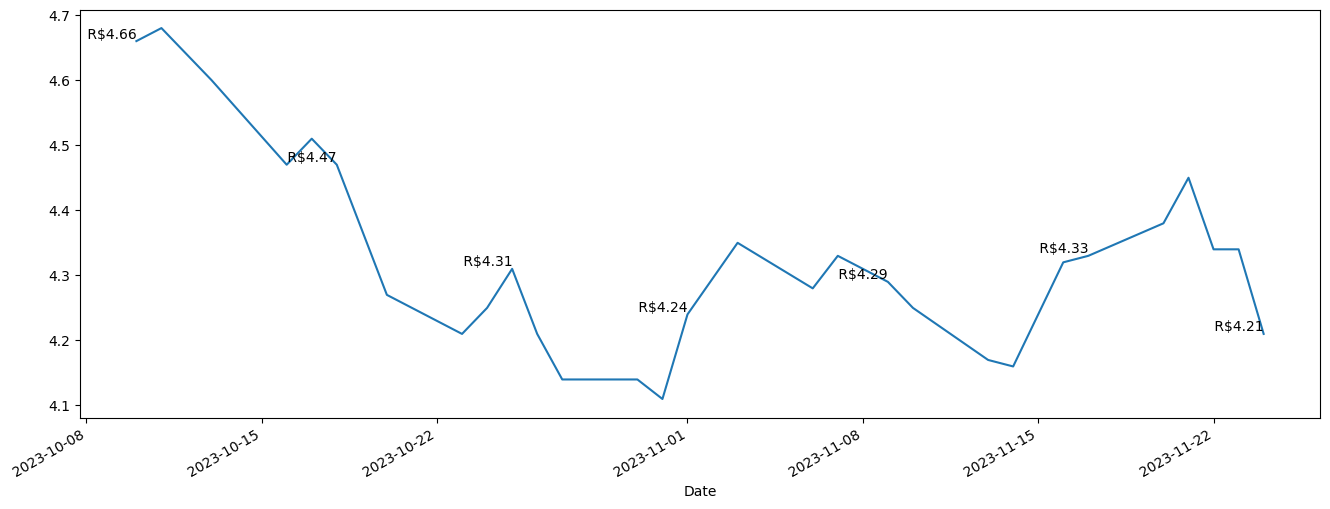

In [5]:
ticker= 'PMAM3.SA' # ação
preco= yf.Ticker(ticker).history(period='31d') # coleta de preços dos 1 meses
historico= preco['Close'] # preços de fechamento

primeiro_preco= historico[0] #primeiro valor
ultimo_preco= historico[-1] #ultimo valor
preco_atual= historico[-1] #preço atual do ticker

porcentagem= ((ultimo_preco - primeiro_preco) / primeiro_preco) * 100 # 

if porcentagem > 0:
    print(f"A ação teve um aumento de {porcentagem:.2f}% durante o período.")
elif porcentagem < 0:
    print(f"A ação teve uma queda de {(porcentagem):.2f}% durante o período.")
else:
    print("Não houve mudança no preço da ação durante o período.")

plt.figure(figsize=(16,6))
historico.plot()

# Adicionando o preço das ações em cada ponto do gráfico
for i in range(0,len(historico), 5):
    plt.text(historico.index[i], historico[i], f' R${historico[i]:.2f}', fontsize=10, ha='right', va='bottom')

plt.show()



/tmp/ipykernel_2325/906831076.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  primeiro_preco = historico[0]
/tmp/ipykernel_2325/906831076.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ultimo_preco = historico[-1]
/tmp/ipykernel_2325/906831076.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  preco_atual = historico[-1]
/tmp/ipykernel_2325/906831076.py:34: FutureWarning: Series.__getitem__ treating keys as positions is

A ação teve uma queda de -21.46% durante o período.


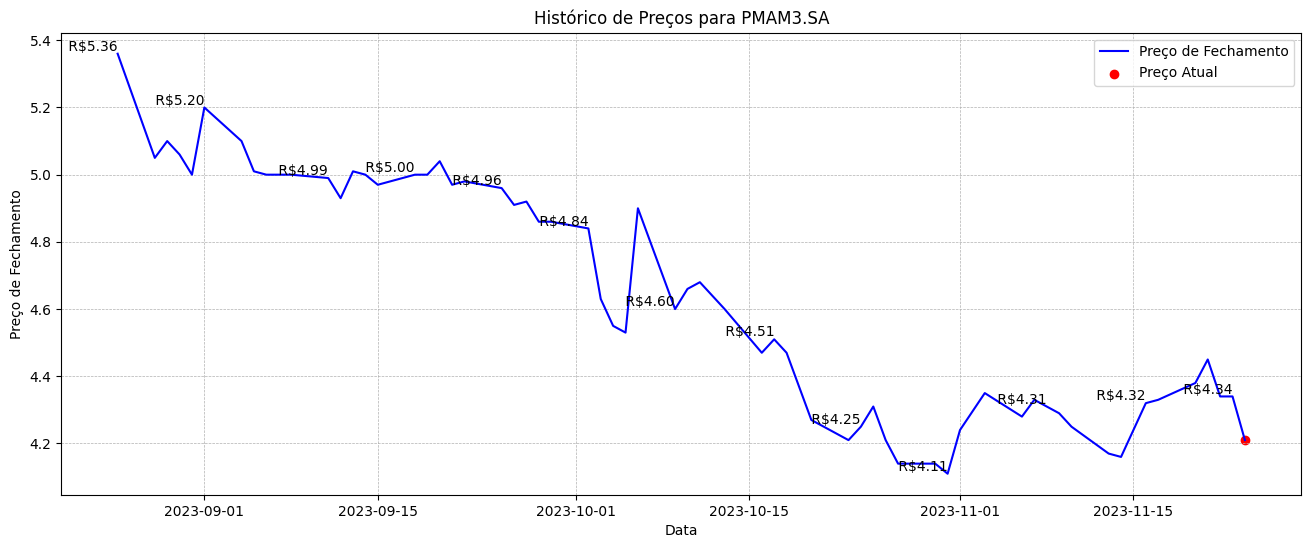

In [6]:
#import yfinance as yf
#import matplotlib.pyplot as plt

# Definindo a ação
acao = 'PMAM3.SA'

# Coletando preços dos últimos 62 dias
preco = yf.Ticker(acao).history(period='62d')
historico = preco['Close']

# Calculando mudança percentual
primeiro_preco = historico[0]
ultimo_preco = historico[-1]
preco_atual = historico[-1]
porcentagem_mudanca = ((ultimo_preco - primeiro_preco) / primeiro_preco) * 100

# Imprimindo informações sobre a mudança percentual
if porcentagem_mudanca > 0:
    print(f"A ação teve um aumento de {porcentagem_mudanca:.2f}% durante o período.")
elif porcentagem_mudanca < 0:
    print(f"A ação teve uma queda de {porcentagem_mudanca:.2f}% durante o período.")
else:
    print("Não houve mudança no preço da ação durante o período.")

# Configurando o gráfico
plt.figure(figsize=(16, 6))
plt.plot(historico, label='Preço de Fechamento', color='blue')

# Adicionando linhas de grade
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adicionando o preço das ações em cada ponto do gráfico
for i in range(0, len(historico), 5):
    plt.text(historico.index[i], historico[i], f' R${historico[i]:.2f}', fontsize=10, ha='right', va='bottom')

# Adicionando marcador para o preço atual
plt.scatter(historico.index[-1], historico[-1], color='red', label='Preço Atual')

# Adicionando rótulos e título
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.title(f'Histórico de Preços para {acao}')
plt.legend()

plt.show()


/tmp/ipykernel_2325/1070432696.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(historico.index[i], historico[i], f' R${historico[i]:.2f}', fontsize=10, ha='right', va='bottom')
/tmp/ipykernel_2325/1070432696.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(historico.index[-1], historico[-1], color='red', label='Preço Atual')
/tmp/ipykernel_2325/1070432696.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos

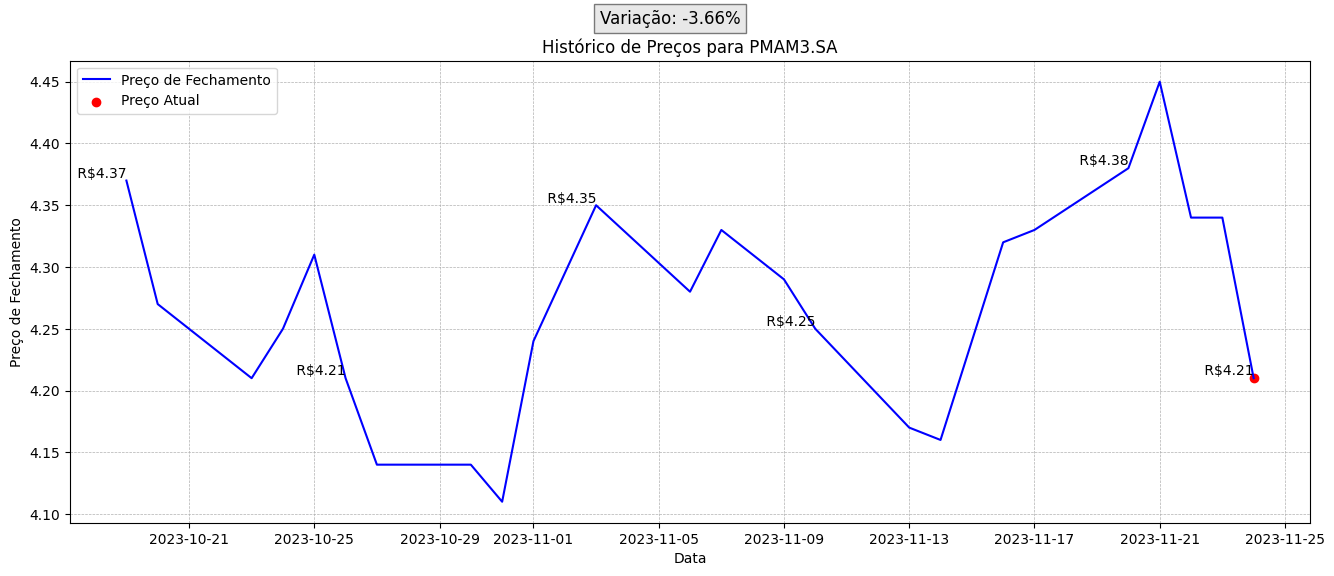

In [7]:
# Definindo a ação
acao = 'PMAM3.SA'

# Coletando preços dos últimos 62 dias
preco = yf.Ticker(acao).history(period='25d')
historico = preco['Close']

# Calculando mudança percentual
primeiro_preco = historico.iloc[0]
ultimo_preco = historico.iloc[-1]
porcentagem_mudanca = ((ultimo_preco - primeiro_preco) / primeiro_preco) * 100

# Imprimindo informações sobre a mudança percentual no gráfico
info_text = f'Variação: {porcentagem_mudanca:.2f}%'
plt.figure(figsize=(16, 6))
plt.figtext(0.5, 0.95, info_text, ha='center', va='center', fontsize=12, bbox=dict(facecolor='lightgray', alpha=0.5))

# Configurando o gráfico
plt.plot(historico, label='Preço de Fechamento', color='blue')

# Adicionando linhas de grade
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adicionando o preço das ações em cada ponto do gráfico
for i in range(0, len(historico), 5):
    plt.text(historico.index[i], historico[i], f' R${historico[i]:.2f}', fontsize=10, ha='right', va='bottom')

# Adicionando marcador para o preço atual com valor
plt.scatter(historico.index[-1], historico[-1], color='red', label='Preço Atual')
plt.text(historico.index[-1], historico[-1], f' R${historico[-1]:.2f}', fontsize=10, ha='right', va='bottom')

# Adicionando rótulos e título
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.title(f'Histórico de Preços para {acao}')
plt.legend()

plt.show()


/tmp/ipykernel_2325/4064064419.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(historico.index[i], historico[i], f'R${historico[i]:.2f}', fontsize=10, ha='right', va='bottom')


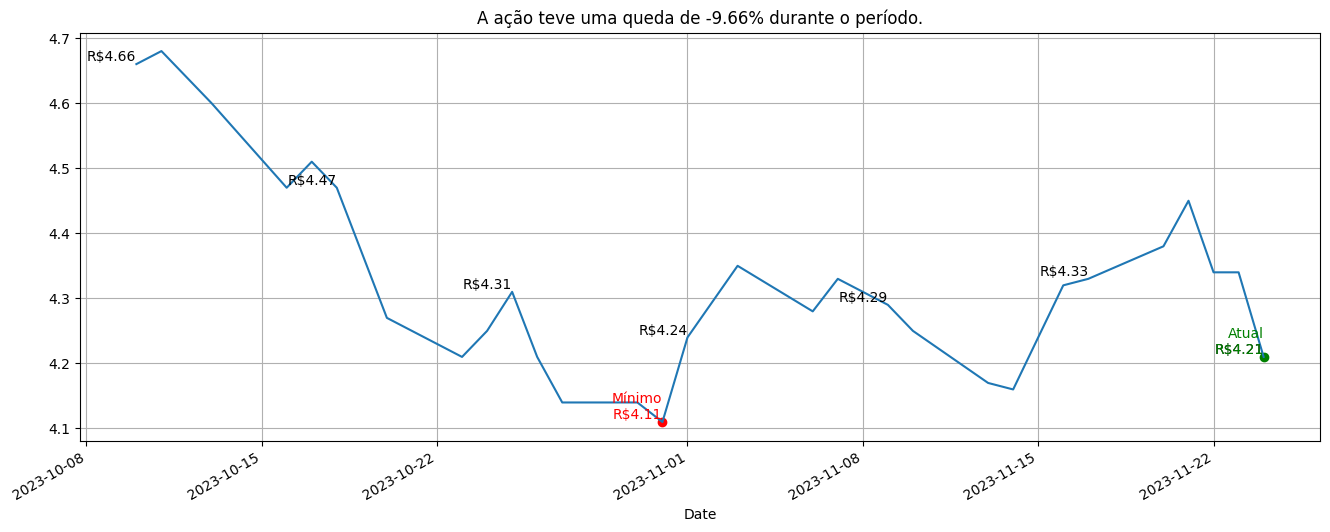

In [10]:
# Substitua 'PMAM3.SA' pela ação desejada
acao = 'PMAM3.SA'

# Coleta de preços dos últimos 62 dias
preco = yf.Ticker(acao).history(period='31d')
historico = preco['Close']

# Encontrar o índice do ponto mais baixo
indice_minimo = historico.idxmin()
valor_minimo = historico.min()

# Preços iniciais e finais
primeiro_preco = historico.iloc[0]
ultimo_preco = historico.iloc[-1]

# Porcentagem de mudança
porcentagem_mudanca = ((ultimo_preco - primeiro_preco) / primeiro_preco) * 100

# Imprimir informações sobre a mudança percentual
if porcentagem_mudanca > 0:
    status = f"A ação teve um aumento de {porcentagem_mudanca:.2f}% durante o período."
elif porcentagem_mudanca < 0:
    status = f"A ação teve uma queda de {porcentagem_mudanca:.2f}% durante o período."
else:
    status = "Não houve mudança no preço da ação durante o período."

# Criar o gráfico
plt.figure(figsize=(16, 6))
historico.plot()

# Adicionar o preço das ações em cada ponto do gráfico
for i in range(0, len(historico), 5):
    plt.text(historico.index[i], historico[i], f'R${historico[i]:.2f}', fontsize=10, ha='right', va='bottom')

# Adicionar uma anotação para o ponto mais baixo
plt.scatter(indice_minimo, valor_minimo, color='red')  # Marcar o ponto mais baixo com um ponto vermelho
plt.text(indice_minimo, valor_minimo, f'Mínimo\nR${valor_minimo:.2f}', color='red', ha='right', va='bottom')

# Adicionar uma anotação para o ponto mais atual
plt.scatter(historico.index[-1], historico.iloc[-1], color='green')  # Marcar o ponto mais atual com um ponto verde
plt.text(historico.index[-1], historico.iloc[-1], f'Atual\nR${historico.iloc[-1]:.2f}', color='green', ha='right',
         va='bottom')

# Adicionar linhas de grade
plt.grid(True)

# Adicionar o status como rótulo
plt.title(status, fontsize=12)

# Exibir o gráfico
plt.show()


# Gerar análises

1. 6 meses dos valores das ações
2. cotação maxima
3. cotação minima
4. media dos preços
5. cotação atual

/tmp/ipykernel_2325/2311692112.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  preco_atual = round(float(historico[-1]), 2)


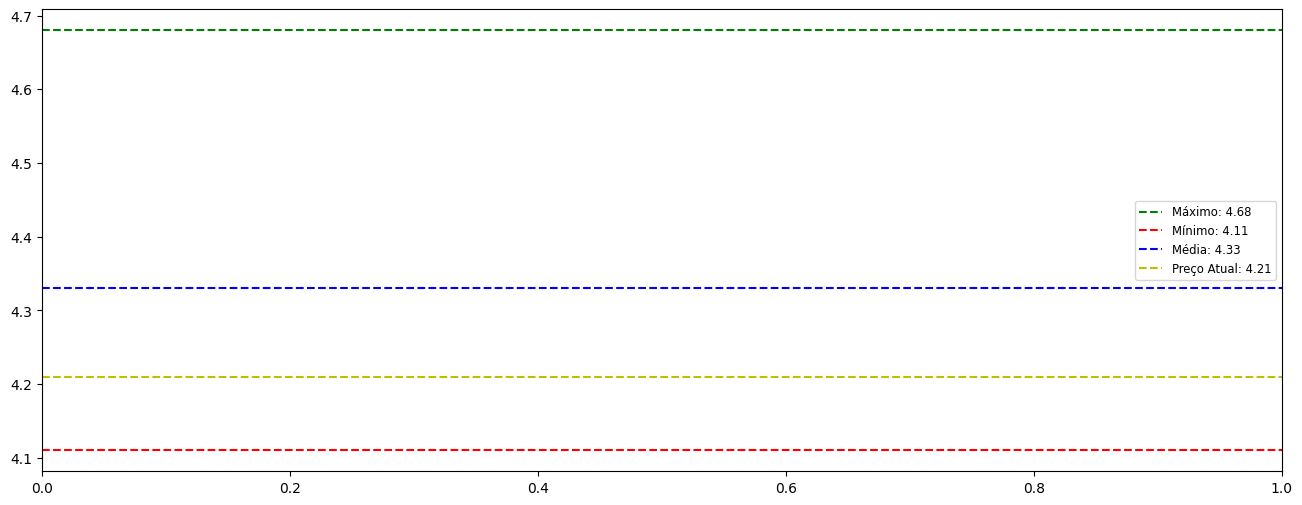

In [11]:
maxima = round(historico.max(), 2)
minima = round(historico.min(), 2)
media= round(historico.mean(), 2)
preco_atual = round(float(historico[-1]), 2)

plt.figure(figsize=(16,6))
plt.axhline(y=maxima, color='g', linestyle='--', label=f'Máximo: {maxima}')
plt.axhline(y=minima, color='r', linestyle='--', label=f'Mínimo: {minima}')
plt.axhline(y=media, color='b', linestyle='--', label=f'Média: {media}')
plt.axhline(y=preco_atual, color='y', linestyle='--', label=f'Preço Atual: {preco_atual}')

plt.legend(fontsize='small')

plt.show()